In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('weight-height.csv')

In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
# Renaming the columns
df = df.rename(columns={'Height':'Weight','Weight':'Height'})

In [ ]:
df_required = df[['Height','Weight']]

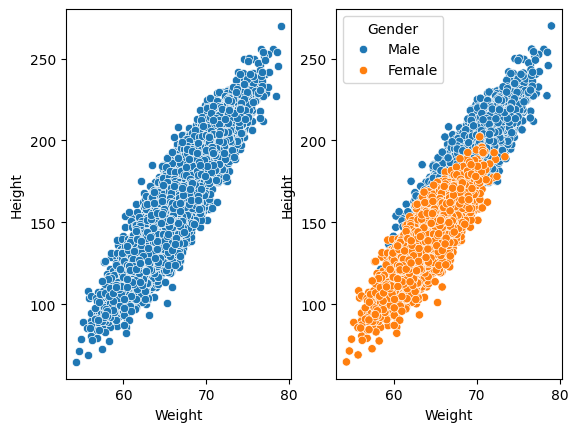

In [ ]:
#Scatter Plot
import seaborn as sns
plt.subplot(1,2,1)
sns.scatterplot(df,x='Weight',y='Height')

plt.subplot(1,2,2)
sns.scatterplot(df,x='Weight',y='Height',hue='Gender')
plt.show()

In [ ]:
# Correlation
df_required.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


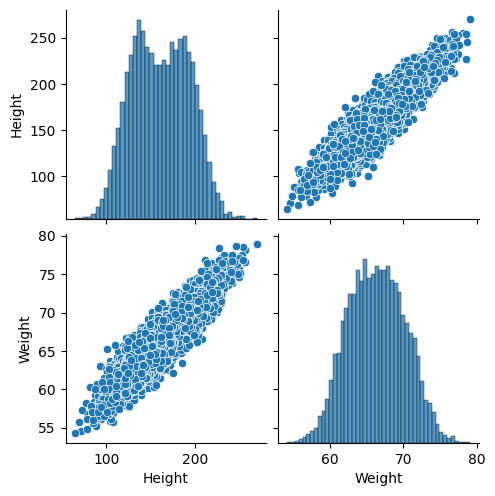

In [ ]:
#Seaborn
import seaborn as sns
sns.pairplot(df_required)

In [ ]:
# Separate Independent & Dependent Features
X = df_required[['Weight']]
y = df_required['Height']

In [ ]:
# Split Train & Test Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train.shape

(7500, 1)

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # No Fit, since we want to use the mean of the Train data only.

In [ ]:
## Apply Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(n_jobs = -1)
regressor.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("Coefficient or Slope : ",regressor.coef_) # gives the Slope
print("Intercept: ",regressor.intercept_) # gives the intercept

Coefficient or Slope :  [29.63915258]
Intercept:  161.353786086951


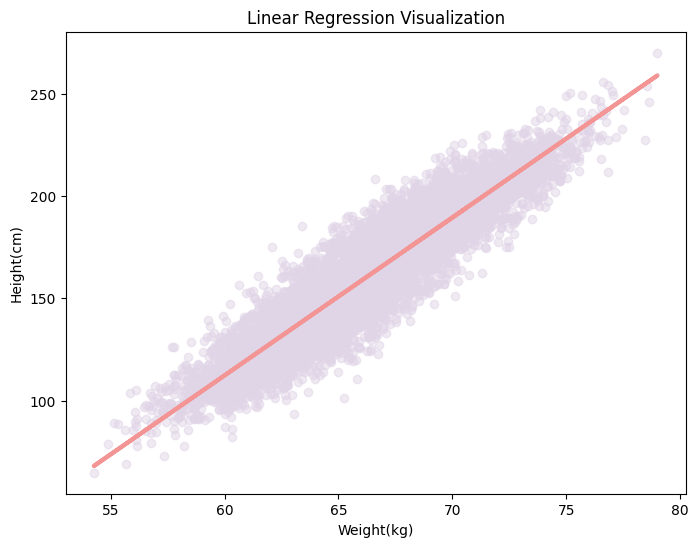

In [ ]:
# Plot Best Fit line wrt Training Data
fig, ax = plt.subplots(figsize=(8,6))

# Need to inverse transform to see our Original Data
ax.scatter(sc.inverse_transform(X_train),y_train,color='#E0D4E7',alpha=0.5)

# Plot the line
plt.plot(sc.inverse_transform(X_train),regressor.predict(X_train),color='#F49595',linewidth = 3)

# Add a title and axis label
ax.set_title('Linear Regression Visualization')
ax.set_xlabel('Weight(kg)')
ax.set_ylabel('Height(cm)')

# Show the plot
plt.show()

### Prediction of Test Data
1. Predicted height Outptut = intercept + coef_(Weights)
2. y_pred_test = 156.470 + 1.26(X_test)

In [ ]:
# Prediction for test date
y_pred = regressor.predict(X_test)

In [ ]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error : ",mse)
print("Mean Absolute Error : ",mae)
print("Root Mean Squared Error : ",rmse)

Mean Squared Error :  151.46996027337104
Mean Absolute Error :  9.81509183752961
Root Mean Squared Error :  12.307313284115711


## R Square
Formula : R^2 = 1 - SSR/SST

R^2 = Coefficient of Determination SSR = sum of squares of residuals SST = Total of squares

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test,y_pred)
print("Score: ",score)

Score:  0.8546574156401214


**Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**
where:
R2 : The R2 of the model n: The number of observations k : The number of predictor variables

In [ ]:
# Display adjusted R-Squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.854599232059513

In [ ]:
# OLS Linear Regression
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train,X_train).fit()

In [ ]:
prediction = model.predict(X_test)
print("Prediction: ",prediction)

Prediction:  [-12.63460428   7.03399013  62.98269029 ...  15.70163243  -9.10686168
 -43.5295451 ]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              251.6
Date:                Fri, 25 Oct 2024   Prob (F-statistic):                    9.33e-56
Time:                        08:09:36   Log-Likelihood:                         -48790.
No. Observations:                7500   AIC:                                  9.758e+04
Df Residuals:                    7499   BIC:                                  9.759e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Prediction for new data
regressor.predict(sc.transform([[150]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([806.90913246])